In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 12.0) 


In [2]:
#define the column start and end points
cols=[(0,3),(5,8),(10,14),(16,23),(25,31),(33,40),(42,48),(50,56),(58,63),(65,71),(73,73),(75,75),(77,84),(86,87)]
cols+=[(89,91),(93,111),(113,117),(119,123),(125,129),(131,135),(137,141),(143,147),(149,153),(155,159),(161,165)]
cols+=[(167,171),(173,178),(180,185)]

#read in the data
data=pd.read_fwf("virgo_data.txt",colspecs=cols,skiprows=57,header=None)

#rename the columns
data.rename(columns={0:'idEVC',1:'idVC',2:'ngc',3:'RAdeg',4:'DEdeg',5:'FRAdeg',6:'FDEdeg',7:'Offset'},inplace=True)
data.rename(columns={8:'SRvel',9:'NRvel',10:'memIn',11:'memVC',12:'pmorph',13:'smorph',14:'nmorph'},inplace=True)
data.rename(columns={15:'vmorph',16:'umag',17:'eumag',18:'gmag',19:'egmag',20:'rmag',21:'ermag'},inplace=True)
data.rename(columns={22:'imag',23:'eimag',24:'zmag',25:'ezmag',26:'rad',27:'r50'},inplace=True)


In [3]:
data.describe()

,idEVC,idVC,ngc,RAdeg,DEdeg,FRAdeg,FDEdeg,Offset,SRvel,NRvel,...,gmag,egmag,rmag,ermag,imag,eimag,zmag,ezmag,rad,r50
count,1589.000000,910.000000,293.000000,1589.000000,1589.000000,1324.000000,1324.000000,1324.000000,1324.000000,1153.000000,...,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,90.308370,102.928571,512.143345,187.192651,9.261709,187.160855,9.764228,2.767152,1391.812689,1473.313964,...,15.520013,0.020699,15.024607,0.020541,14.727627,0.020673,14.599119,0.035802,52.537885,12.893077
std,65.042899,60.406747,521.802297,4.206287,6.105038,4.152028,5.956567,7.438196,764.724471,2969.519864,...,1.978248,0.016914,2.055378,0.009407,2.097974,0.009834,2.162044,0.057191,47.719268,10.502801
min,0.000000,1.000000,381.000000,175.077000,-4.579000,175.077000,-3.682000,0.000000,-745.000000,-730.000000,...,8.900000,0.020000,8.200000,0.020000,7.800000,0.020000,7.600000,0.030000,4.900000,0.800000
25%,39.000000,49.000000,430.000000,184.841000,5.283000,184.812750,5.765000,0.241000,902.000000,894.000000,...,14.300000,0.020000,13.800000,0.020000,13.500000,0.020000,13.300000,0.030000,24.000000,6.200000
50%,79.000000,101.000000,444.000000,186.942000,9.879000,186.870000,10.344500,0.652000,1310.000000,1306.000000,...,15.900000,0.020000,15.400000,0.020000,15.100000,0.020000,15.000000,0.030000,38.600000,10.100000
75%,119.000000,155.000000,458.000000,189.830000,13.322000,189.798750,13.581000,1.808250,1988.250000,1972.000000,...,17.100000,0.020000,16.700000,0.020000,16.400000,0.020000,16.300000,0.030000,63.900000,16.200000
max,226.000000,209.000000,4519.000000,199.589000,24.921000,199.531000,24.923000,86.492000,2982.000000,98609.000000,...,20.600000,0.650000,20.500000,0.340000,19.600000,0.320000,19.600000,1.620000,476.700000,101.200000


In [4]:
print data['SRvel'].mean()/3e5 #redshift and it's std, consistent with NED!
print data['SRvel'].std()/3e5

0.00463937562941
0.00254908156861


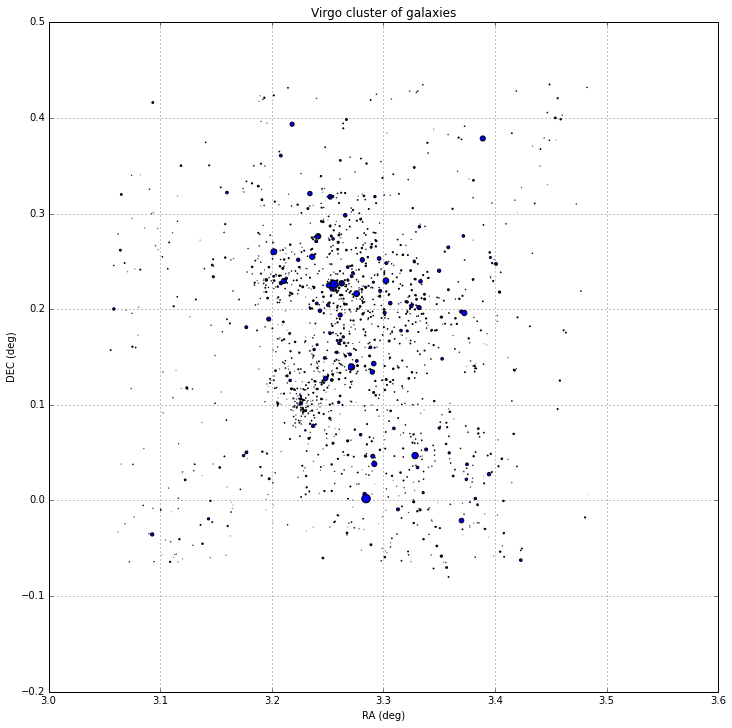

In [9]:
#plt.polar(True)
plt.scatter(np.pi*data['RAdeg']/180.,np.pi*data['DEdeg']/180.,s=np.pi*(data['rad']/100.)**2)
plt.grid(True)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('Virgo cluster of galaxies')

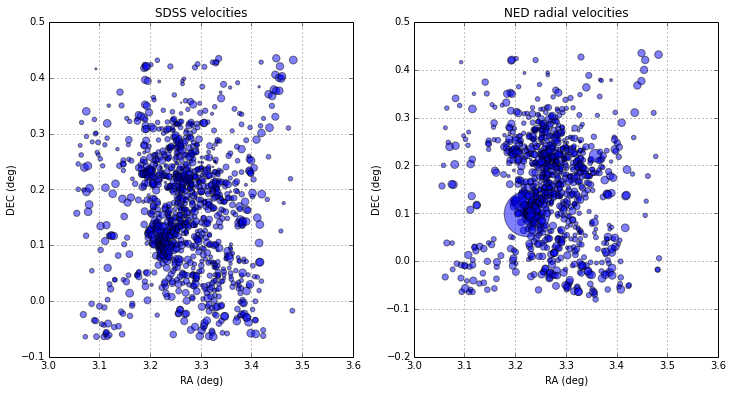

In [25]:
f = plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(np.pi*data['RAdeg']/180.,np.pi*data['DEdeg']/180.,s=np.pi*(data['SRvel'])/150., alpha=0.5)
plt.grid(True)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('SDSS velocities')
plt.subplot(1, 2, 2)
plt.scatter(np.pi*data['RAdeg']/180.,np.pi*data['DEdeg']/180.,s=np.pi*(data['NRvel'])/150., alpha=0.5)
plt.grid(True)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('NED radial velocities')


In [30]:
#df = pd.DataFrame(data)
members = data.loc[data['memIn'] == 'M']

TypeError: invalid type comparison

In [33]:
print data['memVC']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
1559   NaN
1560   NaN
1561   NaN
1562   NaN
1563   NaN
1564   NaN
1565   NaN
1566   NaN
1567   NaN
1568   NaN
1569   NaN
1570   NaN
1571   NaN
1572   NaN
1573   NaN
1574   NaN
1575   NaN
1576   NaN
1577   NaN
1578   NaN
1579   NaN
1580   NaN
1581   NaN
1582   NaN
1583   NaN
1584   NaN
1585   NaN
1586   NaN
1587   NaN
1588   NaN
Name: memVC, dtype: float64
